# Actividad 1: M2003B
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)

## Instrucciones:
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Procure NO usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor


In [52]:
# cargar librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import pandas as pd

## 0. Introducción

### 0.1. Simulación del experimento de lanzamientos de dado
*Ejercicio:* 
- Definir el número de eventos a simular
- Definir el tipo de dado
- Simular los datos con una distribución adecuada

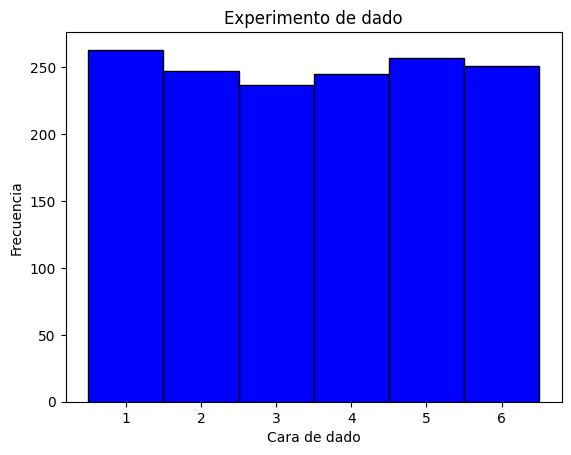

In [113]:

data = np.random.randint(1, 7, size=1500) #Definimos un dado de 6 caras y 1500 lanzamientos
bins = np.arange(0.5, 7.5, 1) 
# aqui graficamos
plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.title("Experimento de dado")
plt.xlabel("Cara de dado")
plt.ylabel("Frecuencia")
plt.show()

### 0.2. Distribuciones Gaussianas (normales)
*Ejercicio:* 
- Escriba código para generar una distribución Gaussiana. Explique los parámetros de dicha función de probabilidad.
- Repita esta actividad para la distribución de Poisson y Bernoilli


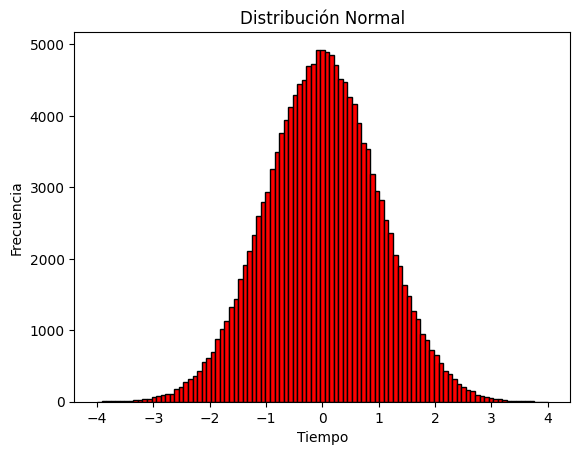

In [54]:
# Inserte su código aquí
np.random.seed(10) #Aquí definimos la seed para que sean los mismos resultados
data = np.random.normal(0,1,150000)
# Aquí definimos en vez de random, con normal, para que sea una distribución normal, con 150k repeticiones, con media 0 y stddev 1
bins = np.linspace(-4, 4, 100) # Aquí definimos que sea visualice de -4 a 4, los rangos normales de la dist. normal
# aqui graficamos
plt.hist(data, bins=bins, color='red', edgecolor='black')
plt.title("Distribución Normal")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

Una distribución normal estándar, con media 0 y varianza 1.

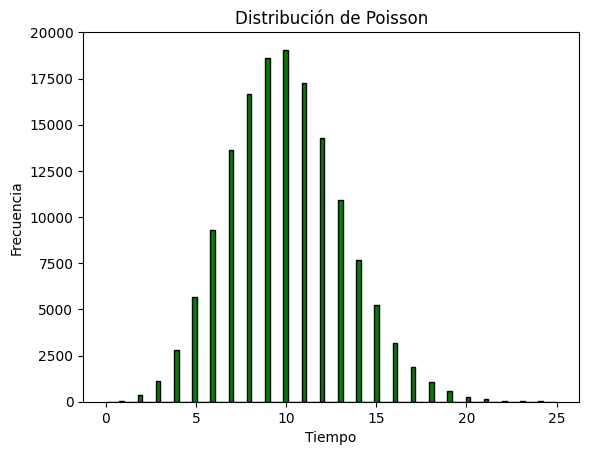

In [87]:
# Inserte su código aquí
np.random.seed(10) #Seed para que sea lo msimo siempre
data = np.random.poisson(10,150000) # Aquí definimos una dist de poisson con lambda 10 y 150k repeticiones 
bins = np.linspace(0, 25, 100) # Aquí definimos que sea visualice de 0 a 25
# aqui graficamos
plt.hist(data, bins=bins, color='green', edgecolor='black')
plt.title("Distribución de Poisson")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar que a mayor observaciones y mayor lambda (después de lambda > 30) se aproxima a una distribución Normal.

Proporción de 1's: 0.1660
Proporción de 0's: 0.8340


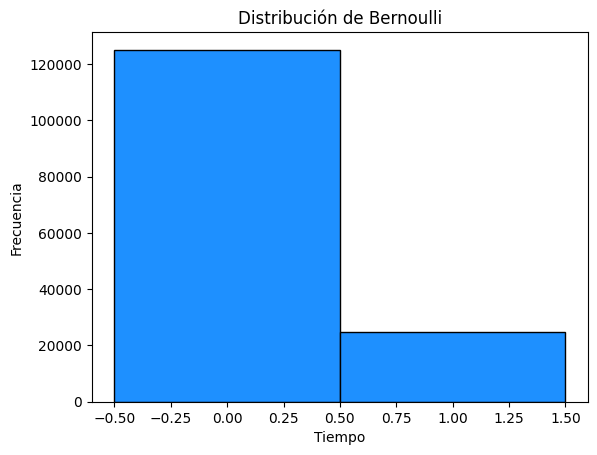

In [ ]:
# Inserte su código aquí
np.random.seed(10) #Seed
p = 1/6 # Aquí definimos la probabilidad de éxito de una Bernoulli, en este caso, 1/6 para sacar, por ejemplo, 1 en el dado
data = np.random.binomial(1,p,150000) # Aquí definimos una dist de Bernoulli, una p de éxito de 0.3 y 150k repeticiones 
bins = [-0.5, 0.5, 1.5]  # Aquí definimos que sea visualice de -0.5 a 1.5 con step de 0.5 para que las bins sean centradas en 0 y 1, los valores de una bernoulli
prop_1 = np.mean(data)  
prop_0 = 1 - prop_1 
print(f"Proporción de 1's: {prop_1:.4f}")
print(f"Proporción de 0's: {prop_0:.4f}")
# aqui graficamos
plt.hist(data, bins=bins, color='dodgerblue', edgecolor='black')
plt.title("Distribución de Bernoulli")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

Una distribución de Bernoulli, que define el éxito como 1 y fracaso como 0, según una probabilidad p. En este caso le asigné p = 1/6, que es la probabilidad de sacar un número 1.
Como podemos ver, si definimos éxito como sacar 1 en el dado, la proporción de éxitos en el experimento se aproxima a la probabilidad teórica de sacar 1 en mayor número de repeticiones.

### 0.3. Crear, guardar y cargar datos
*Ejercicio:* 
- Crear, guardar y cargar dichos datos
- Asegúrese que los datos coinciden con lo que espera
- Siga los "leads" en el código siguiente

In [67]:
# aqui simulamos los datos, por ejemplo gaussianos
# ...
# ...
# ...
np.random.seed(10)
data = np.random.normal(4,25,150000)

# aqui creamos un pandas data frame para guardar los datos
df = pd.DataFrame({
        'data': data,
    })

# guardamos los datos en un archivo CSV
nombre_archivo = "datos_gaussianos.csv"
df.to_csv(nombre_archivo, index=False)
print(f"datos guardados en {nombre_archivo}")

# ahora cargamos los datos
datos_cargados = pd.read_csv("datos_gaussianos.csv")

datos guardados en datos_gaussianos.csv


### Ahora grafiquemos los datos
Compruebe que los datos están de acuerdo con lo que esperabamos. Para lo anterior, calculemos la media y la desviación estándar usando funciones de numpy y a mano. Compare sus respuestas.



In [68]:
### Escriba su código aquí
datos = datos_cargados['data']
#Con numpy
media = np.mean(datos)
stddev = np.std(datos)
print(f"Media: {media:.2f}, Desviación estándar: {stddev:.2f}")
#A mano
media = sum(datos)/len(datos)
stddev = (sum((x - media) ** 2 for x in datos) / len(datos)) ** 0.5
print(f"Media (a mano): {media:.2f}, Desviación estándar (a mano): {stddev:.2f}")


Media: 3.92, Desviación estándar: 24.97
Media (a mano): 3.92, Desviación estándar (a mano): 24.97


Dado que era una distribución normal random generada con media 4 y varianza 25, los resultados de ambos a mano y numpy se aproximan casi perfectamente a esto.

### 0.4 Probabilidad (densidad) multivariada
- Genere datos en dos dimensiones distribuidos siguiendo una probabilidad Gaussiana
- Grafique los datos usando un histograma en dos dimensiones
- Guarde los datos en un archivo csv
- Cargue los datos y grafique cada una de las variables en un histograma sencillo
- Realizar un ajuste para encontrar la PDF analítica y graficar

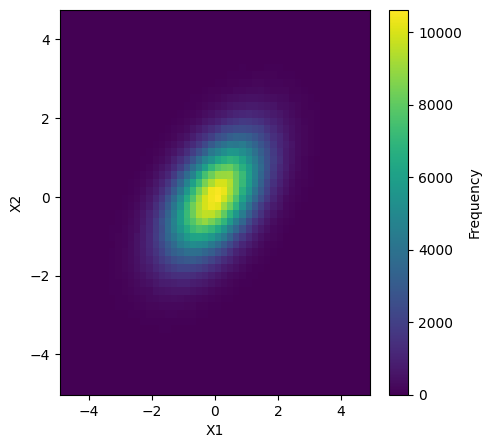

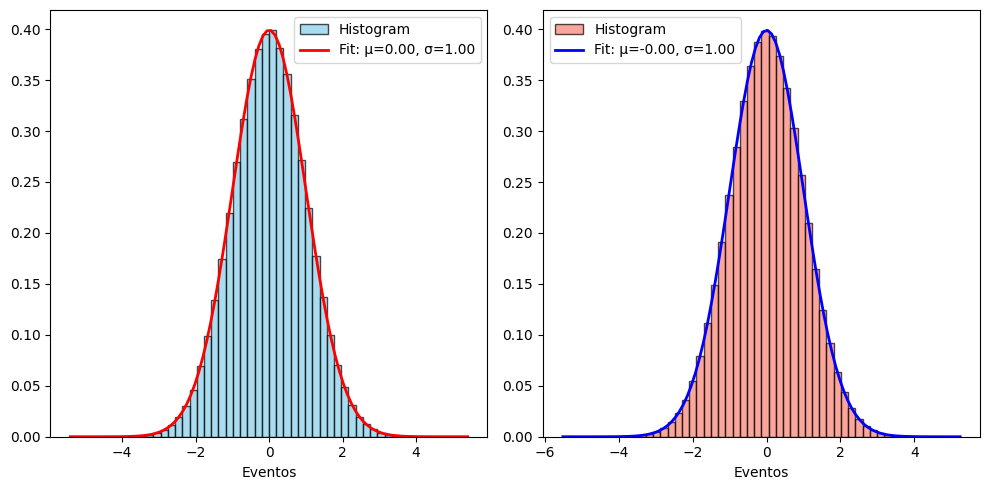

In [114]:
# generar los datos
# [Sugerencia: use np.random.multivariate_normal()]
data = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]],1500000)


# aqui graficamos
plt.figure(figsize=(5, 5))
plt.hist2d(data[:, 0], data[:, 1], bins=50, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# guardar datos
df = pd.DataFrame(data, columns=['X1', 'X2'])
df.to_csv('gaussian_2d_data.csv', index=False)

# cargar datos
# inserte código aqui
df_cargado = pd.read_csv('gaussian_2d_data.csv')
x = df_cargado['X1']
y = df_cargado['X2']


# 
plt.figure(figsize=(10, 5))

# First variable histogram and fit
plt.subplot(1, 2, 1)
x1 = x
# hacer el fit [Sugerencia: usar norm.fit() ]
mu, std = norm.fit(x1)
plt.hist(x1, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, 
         label='Histogram')

# graficar el ajuste
xmin, xmax = plt.xlim()
x_fit = np.linspace(xmin, xmax, 100)
y_fit = norm.pdf(x_fit, mu, std)
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={std:.2f}')
plt.xlabel('Eventos')
plt.legend()

# mismos comentarios que para x1
plt.subplot(1, 2, 2)
x2 = y
mu, std = norm.fit(x2)
plt.hist(y, bins=50, density=True, color='salmon', edgecolor='black', alpha=0.7, 
         label='Histogram')

# graficar el ajuste 
ymin, ymax = plt.xlim()
y_fit = np.linspace(ymin, ymax, 100)
y_pdf = norm.pdf(y_fit, mu, std)
plt.plot(y_fit, y_pdf, 'b-', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={std:.2f}')
plt.xlabel('Eventos')
plt.legend()

plt.tight_layout()
plt.show()

## 1. Teorema del límite central

### 1.1 Distribuciones Gaussianas
**Ejercicio:** Muestre numéricamente que la combinación lineal de distribuciones Gaussianas es una distribución Gaussiana. Asegúrese de que esta nueva distribución en efecto sea Gaussiana con una prueba de Shapiro-Wilk, es decir encuentre un p-valor a aceptar que es Gaussiana.


In [108]:

def sum_gaussians_tlc(num_samples, n_gaussians):
    """
    Función para generar n distribuciones gaussianas independientes,
    y luego generar una combinación lineal de estas distribuciones.
    Finalmente, ajusta una distribución normal a la combinación lineal y
    realiza una prueba de normalidad (Shapiro-Wilk) sobre los datos generados.
    """
    # Generate independent Gaussian distributions
    means = np.random.uniform(-5, 5, n_gaussians)
    std_devs = np.random.uniform(0.5, 2, n_gaussians)
    coefficients = np.random.uniform(0.1, 1, n_gaussians)  

    # Initialize an empty list to store the samples
    gaussians = []

    # Loop through each Gaussian distribution
    for i in range(n_gaussians):
        # Generate samples for the current Gaussian distribution
        samples =  np.random.normal(means[i], std_devs[i], num_samples) * coefficients[i]
        # Add the generated samples to the list
        gaussians.append(samples)

    # Linear combination of these Gaussians
    linear_combination = np.zeros(num_samples)
    for i in range(n_gaussians):
        linear_combination = linear_combination + gaussians[i]

    # Fit a Gaussian (normal) distribution to the linear combination
    mu, std = norm.fit(linear_combination)

    # Plot the histogram of the linear combination
    plt.figure(figsize=(8, 6))
    count, bins, _ = plt.hist(linear_combination, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black', label='Linear Combination')

    # Plot the Gaussian fit
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for plotting the fit over the same range
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Gaussian distribution fit

    # Scale the fit by the max height of the histogram to make it align
    plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian mean={mu:.2f}, std={std:.2f}')

    # Perform the Shapiro-Wilk test for normality
    stat, p_value = shapiro(linear_combination)

    # Display the p-value on the plot
    plt.text(xmin + (xmax - xmin) * 0.05, max(count) * 0.9, f'p-value: {p_value:.5f}', fontsize=12, color='red')

    # Add labels, title, and legend
    plt.title(f'Linear Combination of {n_gaussians} Gaussian Distributions\nSample Size: {num_samples}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

    # Print the p-value
    if p_value > 0.05:
        print(f"La combinación lineal de {n_gaussians} distribuciones probablemente sigue una dist. normal  (p-value: {p_value:.5f})")
    else:
        print(f"La combinación lineal de {n_gaussians} distribuciones probablemente  NO sigue una dist. normal  (p-value: {p_value:.5f})")


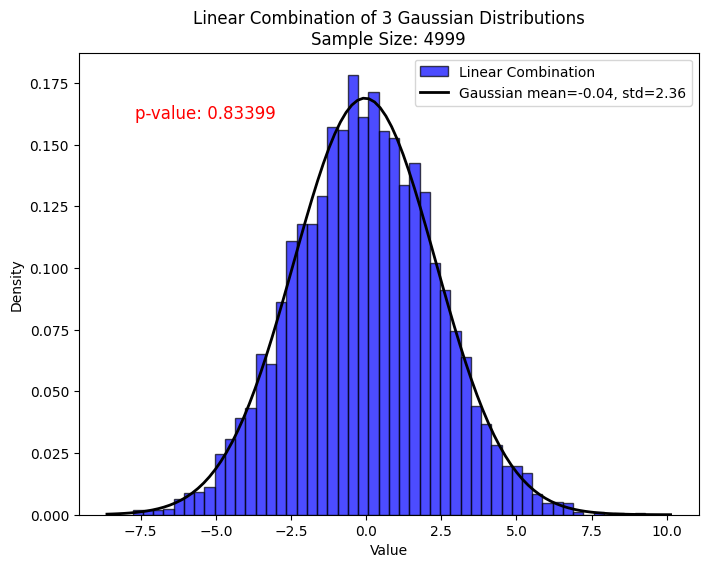

La combinación lineal de 3 distribuciones probablemente sigue una dist. normal  (p-value: 0.83399)


In [109]:
# Ejecute su código
sum_gaussians_tlc(4999,3)

### 1.2 Distribuciones uniformes

**Ejercicio**: Repita el ejercicio anterior con distribuciones uniformes finitas. Es decir, el teorema establece que la distribución de
la combinación lineal de un gran número de variables aleatorias independientes e idénticamente distribuidas se aproximará a una distribución normal. Sume cuando menos 50 distribuciones.

In [ ]:
def sum_uniforms_tlc(num_samples=4999, n_uniforms=100):
    """
    Función para generar n distribuciones uniformes independientes,
    y luego generar una combinación lineal de estas distribuciones.
    Finalmente, ajusta una distribución normal a la combinación lineal y
    realiza una prueba de normalidad (Shapiro-Wilk) sobre los datos generados.
    """
    # Generate independent uniform distributions
    lower_bounds = np.random.uniform(-10, 0, n_uniforms)
    upper_bounds = np.random.uniform(0, 10, n_uniforms)
    coefficients = np.random.uniform(0.1, 1, n_uniforms)

    uniforms = []

    # Loop through each uniform distribution
    for i in range(n_uniforms):
        # Generate random samples for the current uniform distribution
        current_samples = np.random.uniform(lower_bounds[i], upper_bounds[i], num_samples) * coefficients[i]
        # Append the generated samples to the list
        uniforms.append(current_samples)
    
    # Linear combination of these uniforms
    linear_combination = np.zeros(num_samples)
    for i in range(n_uniforms):
        linear_combination = linear_combination + uniforms[i]
    # Fit a Gaussian (normal) distribution to the linear combination
    mu, std = norm.fit(linear_combination)

    # Plot the histogram of the linear combination
    plt.figure(figsize=(8, 6))
    count, bins, _ = plt.hist(linear_combination, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black', label='Linear Combination')

    # Plot the Gaussian fit
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for plotting the fit over the same range
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Gaussian distribution fit

    # Scale the fit by the max height of the histogram to make it align
    plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian mu={mu:.2f}, sigma={std:.2f}')

    # Perform the Shapiro-Wilk test for normality
    stat, p_value = shapiro(linear_combination)

    # Display the p-value on the plot
    plt.text(xmin + (xmax - xmin) * 0.05, max(count) * 0.9, f'p-value: {p_value:.5f}', fontsize=12, color='red')

    # Add labels, title, and legend
    plt.title(f'Linear Combination of {n_uniforms} Uniform Distributions\nSample Size: {num_samples}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

    # Print the p-value
    if p_value > 0.05:
        print(f"La combinación lineal de {n_uniforms} distribuciones probablemente sigue una dist. normal  (p-value: {p_value:.5f})")
    else:
        print(f"La combinación lineal de {n_uniforms} distribuciones probablemente  NO sigue una dist. normal  (p-value: {p_value:.5f})")


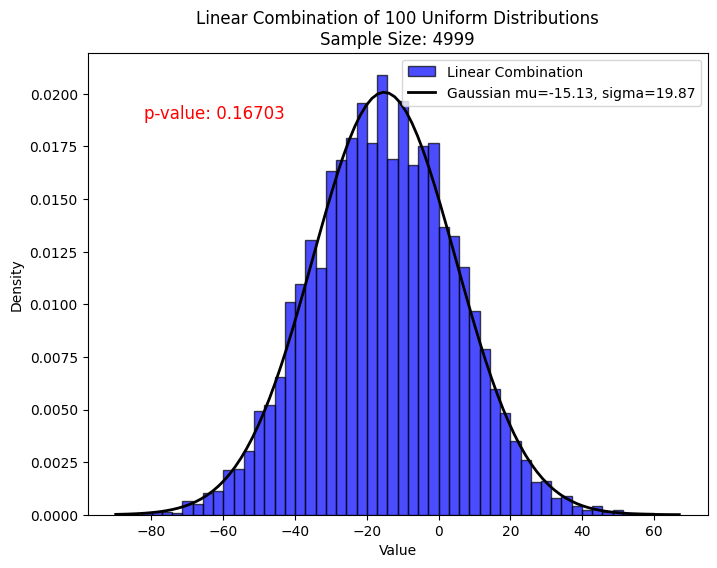

La combinación lineal de 100 distribuciones probablemente sigue una dist. normal  (p-value: 0.16703)


In [117]:
sum_uniforms_tlc(4999,100)